In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import log_loss
from tqdm import tqdm

In [55]:
def initialisation(n0,n1,n2) :
    w1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1,1)
    w2 = np.random.randn(n2,n1)
    b2 = np.random.randn(n2,1)
    hyperparams = {
        "w1" : w1,
        "w2" : w2,
        "b1" : b1,
        "b2" : b2
    }
    return hyperparams

def forward_propagation(x,hyperparams):
    z1 = hyperparams['w1'].dot(x) + hyperparams['b1']
    a1 = 1 / (1 + np.exp(-z1))
    z2 = hyperparams['w2'].dot(a1) + hyperparams['b2']
    a2 = 1 / (1 + np.exp(-z2))
    activation = {
        'a1' : a1,
        'a2' : a2,
    }
    return activation

def backward_propagation(x,y,activation,hyperparams):
    a1 = activation['a1']
    a2 = activation['a2']
    w2 = hyperparams['w2']

    dZ2 = a2 - y
    dW2 = 1/y.shape[1] * dZ2.dot(a1.T)
    db2 = 1/y.shape[1] * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(w2.T,dZ2) * a1 * (1-a1)
    dW1 = 1/y.shape[1] * dZ1.dot(x.T)
    db1 = 1/y.shape[1] * np.sum(dZ1,axis=1,keepdims=True)

    gradients={
        "dw1" : dW1,
        "db1" : db1,
        "dw2" : dW2,
        "db2" : db2,
    }
    return gradients

def update(hyperparams , gradients , learning_rate):
    hyperparams['w1'] = hyperparams['w1'] - learning_rate * gradients['dw1']
    hyperparams['b1'] = hyperparams['b1'] - learning_rate * gradients['db1']
    hyperparams['w2'] = hyperparams['w2'] - learning_rate * gradients['dw2']
    hyperparams['b2'] = hyperparams['b2'] - learning_rate * gradients['db2']

def predict(x,hyperparams):
    activations = forward_propagation(x,hyperparams)
    return activations['a2'] >= 0.5

def neural_network(x_train,y_train,x_test,y_test,n1,learning_rate = 0.1 , n_iter = 100):
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    n0 = x_train.shape[0]
    n2 = 1
    hyperparams = initialisation(n0,n1,n2)
    for i in tqdm(range(n_iter)):
        activation = forward_propagation(x_train,hyperparams)

        if not(i % 10) :

            #Train
            loss_train = log_loss(y_train.flatten(),activation['a2'].flatten())
            y_train_pred = predict(x_train,hyperparams)
            train_loss.append(loss_train)
            train_acc.append(accuracy_score(y_train.flatten(),y_train_pred.flatten()))

            #Test
            test_activation = forward_propagation(x_test,hyperparams)
            loss_test =  log_loss(y_test.flatten(),test_activation['a2'].flatten())
            test_loss.append(loss_test)
            y_test_pred = predict(x_test,hyperparams)
            test_acc.append(accuracy_score(y_test.flatten(),y_test_pred.flatten()))


        gradients = backward_propagation(x_train,y_train,activation,hyperparams)
        update(hyperparams,gradients,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label="Train loss")
    plt.plot(test_loss,label="Test loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label="Train accuracy")
    plt.plot(test_acc,label="Test accuracy")
    plt.legend()
    return hyperparams

##### CatDog classification using  2 layers neural network

In [5]:
from sklearn.preprocessing import MinMaxScaler
from data_loader import load_data

def preprocessing(x_train,x_test,y_train,y_test):
    minmax = MinMaxScaler()
    x_train = np.array([elt.flatten() for elt in x_train])
    x_test = np.array([elt.flatten() for elt in x_test])
    x_train = minmax.fit_transform(x_train)
    x_test = minmax.transform(x_test)
    return x_train.T , x_test.T , y_train.T , y_test.T

x_train,y_train,x_test,y_test = load_data()
x_train , x_test, y_train , y_test = preprocessing(x_train , x_test , y_train, y_test)

100%|██████████| 1000/1000 [00:12<00:00, 80.11it/s]


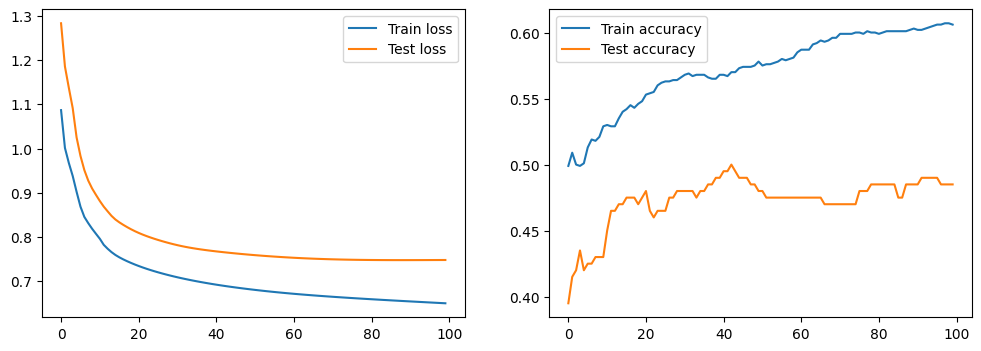

In [57]:
best_hyperparams = neural_network(x_train,y_train,x_test,y_test,n1=32,n_iter=1000)